# Ngram Statistics

Some tests to look at ngram distributions at both the character and word level.

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import os
import pickle

# Set inline plot sizes
plt.rcParams['figure.figsize'] = [15.0, 10.0]

In [2]:
# Start by loading a corpus of 100 documents
from patentdata.corpus import USGrants, USPublications
import patentdata.models.lib.utils as utils

grants = USGrants("/media/SAMSUNG1/US_Grants")
pubs = USPublications("/media/SAMSUNG1/Patent_Downloads")
grants_filegenerator = grants.patentdoc_generator(['G', '06'], sample_size=100)

## Character Ngrams

In [4]:
filegenerator = pubs.patentdoc_generator(['G', '06'], sample_size=200)
doc1 = next(filegenerator)
doc1

554570 records located.
200 records sampled.


<Patent Document object for US20080276275A1, title: Program guide system with video-on-demand browsing - containing: description with 76 paragraphs and claimset with 46 claims; classifications: [['G', '06', 'F', '3', '00']]

In [5]:
def char_ngram_list(text, n):
    """ Return a list of character n-grams from the text."""
    return [text[i:i+n] for i in range(0, len(text)-n+1)]

In [6]:
char_ngram_list(" benjamin ", 2)

[' b', 'be', 'en', 'nj', 'ja', 'am', 'mi', 'in', 'n ']

In [7]:
ngram_list = char_ngram_list(utils.clean_characters(doc1.description.text).lower(), 2)

In [8]:
ngram_list[10:20]

['ti', 'iv', 've', 'e ', ' t', 'te', 'el', 'le', 'ev', 'vi']

In [9]:
ngram_counter = Counter(ngram_list)

In [10]:
ngram_counter.most_common(100)

[('e ', 947),
 (' t', 760),
 (' a', 678),
 ('n ', 662),
 ('on', 649),
 ('in', 600),
 ('ro', 566),
 (' p', 565),
 ('de', 563),
 ('th', 527),
 ('pr', 515),
 ('y ', 513),
 ('d ', 500),
 ('s ', 496),
 ('ra', 481),
 ('vi', 468),
 ('an', 443),
 ('te', 442),
 ('re', 434),
 (' i', 426),
 (' s', 425),
 ('am', 407),
 ('ma', 405),
 ('gr', 397),
 ('og', 396),
 ('er', 393),
 ('is', 387),
 ('he', 384),
 ('ti', 383),
 ('r ', 379),
 ('or', 378),
 (' o', 373),
 ('at', 373),
 ('t ', 365),
 (' d', 332),
 (' c', 332),
 (' v', 332),
 ('io', 325),
 ('id', 318),
 ('ay', 314),
 ('m ', 309),
 ('le', 300),
 ('nd', 291),
 ('a ', 285),
 ('nt', 264),
 ('ed', 263),
 ('en', 259),
 (', ', 258),
 (' b', 258),
 ('se', 257),
 (' m', 256),
 ('es', 256),
 ('o ', 247),
 ('di', 243),
 ('to', 231),
 ('el', 228),
 ('. ', 228),
 ('st', 228),
 ('ng', 219),
 ('em', 217),
 ('ie', 216),
 ('si', 213),
 (' f', 186),
 ('la', 183),
 ('it', 181),
 ('ui', 178),
 ('co', 177),
 ('g ', 174),
 ('pl', 169),
 ('ew', 169),
 ('eo', 166),
 ('ca'

In [12]:
filename = "ngramstats_char_200.pkl"

if os.path.isfile(filename):
    with open(filename, "rb") as f:
        print("Loading data")
        ngram_counter = pickle.load(f)
        print("Stats loaded")
else:
    for n in range(2,5):
        ngram_counter[n] = Counter()
    for i, doc in enumerate(filegenerator):
        if (i % 5) == 0:
            print(i, doc.title)
        text = utils.clean_characters(doc.description.text).lower()
        for n in range(2,5):
            ngram_counter[n] += Counter(char_ngram_list(text, n))
    with open(filename, "wb") as f:
        pickle.dump(ngram_counter, f)

0 TRANSMISSION WITH SUBSTANTIALLY IDENTICAL GEAR SETS FOR TORQUE LOAD SHARING
5 Method and apparatus for controlling initialization of memories
10 Methods and apparatus for implementing dynamic shortcuts both for rapidly accessing web content and application program windows and for establishing context-based user environments
15 NUMA Scheduling Using Inter-vCPU Memory Access Estimation
20 Computer-guided sample handling
25 Methods and apparatus for caching a location index in a data storage system
30 Home network system with transmission error recovery
35 AUTOMATICALLY SELECTING OPTIMAL TRANSPORT PROTOCOL IN A CLOUD COMPUTING ENVIRONMENT
40 DOCUMENT MANAGING APPARATUS AND METHOD CONTROLLING UPDATE OF DOCUMENT DATA
45 SYSTEMS AND METHODS FOR DISTRIBUTED ELECTRONIC SIGNATURE DOCUMENTS
50 WATERMARKING OF DIGITAL VIDEO
55 RECEIPT RETRIEVAL BASED ON LOCATION
60 Apparatus, method, and program for image processing capable of enhancing usability of image data
65 Method for providing file infor

In [15]:
ngram_counter[2].most_common(50)

[('e ', 330107),
 (' t', 256979),
 (' a', 221864),
 ('th', 215149),
 ('in', 190019),
 ('he', 181909),
 ('s ', 163445),
 ('on', 153157),
 ('er', 150668),
 ('n ', 150493),
 (' i', 137754),
 ('re', 137026),
 ('at', 136200),
 ('d ', 134827),
 ('ti', 132906),
 (' o', 126495),
 ('or', 122156),
 (' s', 118419),
 ('t ', 114473),
 ('te', 113719),
 ('r ', 111796),
 ('en', 106834),
 ('an', 105040),
 (' c', 104818),
 ('nt', 103774),
 ('es', 102808),
 (', ', 98409),
 ('ed', 95653),
 ('io', 87495),
 ('y ', 85327),
 ('se', 84243),
 ('a ', 83649),
 (' p', 83565),
 (' m', 79710),
 ('co', 78600),
 (' d', 75653),
 ('to', 74045),
 ('de', 71875),
 ('ng', 71867),
 (' f', 71727),
 ('st', 67349),
 ('le', 67057),
 ('it', 65562),
 ('nd', 64946),
 (' b', 64381),
 ('me', 62018),
 ('ic', 61922),
 ('of', 61857),
 ('ar', 61721),
 ('f ', 61535)]

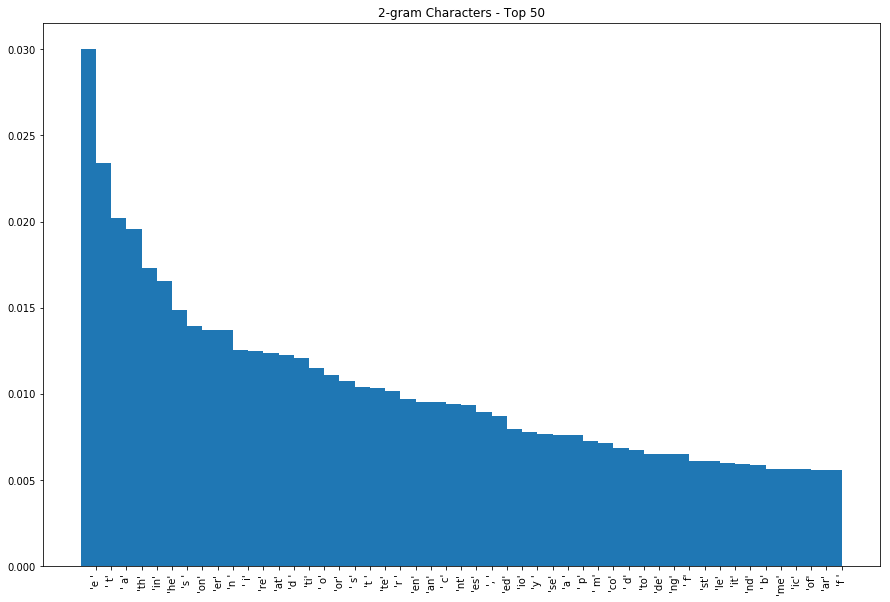

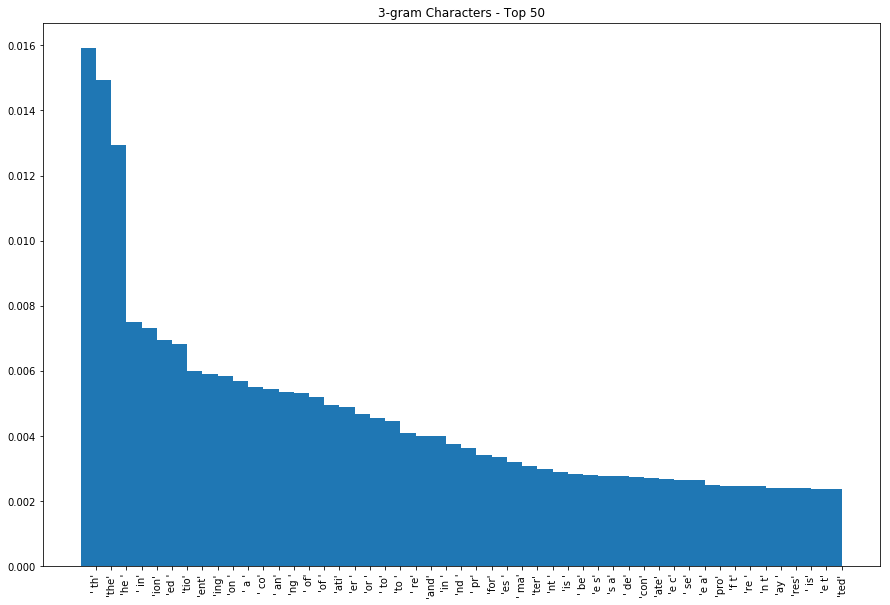

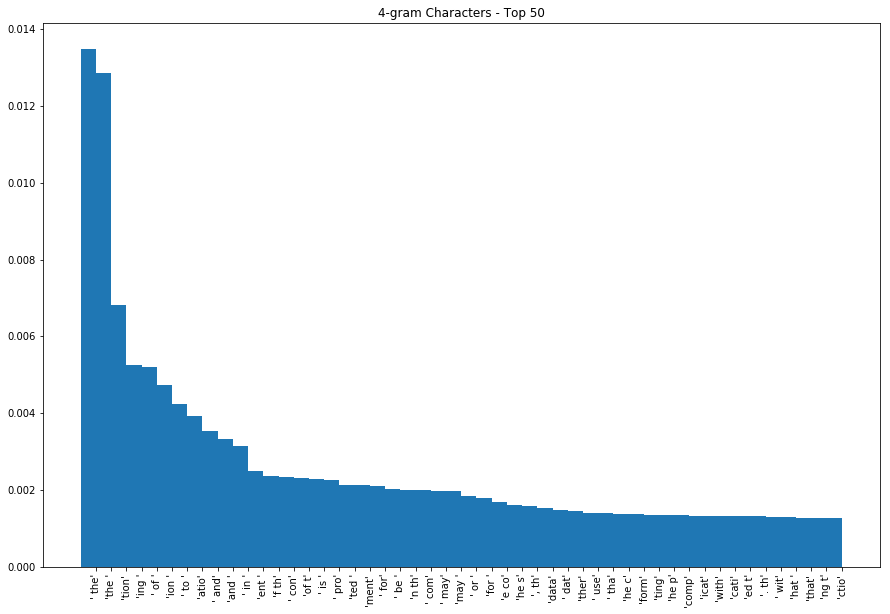

In [14]:
for n in range(2,5):
    # 50 is the max for a width of 15 inches
    labels, values = zip(*ngram_counter[n].most_common(50))

    # Normalise values
    values = np.array(values) / sum(ngram_counter[n].values())
    labels = ["'{0}'".format(l) for l in labels]

    indexes = np.arange(len(labels))
    width = 1

    plt.bar(indexes, values, width)
    plt.xticks(indexes + width * 0.5, labels, rotation=90)
    plt.title("{0}-gram Characters - Top 50".format(n))
    plt.show()

Observations:
* As n increases there is less of a slope - for 4-grams the distribution rapidly converges to a more or less uniform distribution.
* There are a mix of common words and common subwords / endings.
* Spaces need to be thought about - there is some duplication for words when involving spaces but spaces are useful for identifying prefixes / suffixes / inner stems.
* Almost need one parse to take out the common words then only look at n-gram splits on what is left?

## Word Ngrams

In [18]:
# This is the similar to the previous function - but the index is a joined string
def words_ngram_list(words, n):
    """ Return a list of character n-grams from the text."""
    return [" ".join(words[i:i+n]) for i in range(0, len(words)-n+1)]  

In [20]:
word_ngrams = words_ngram_list(doc1.description.bag_of_words(clean_non_words=True, clean_stopwords=False, stem_words=False), 2)
word_ngrams[5:10]

['control method', 'method and', 'and system', 'system and', 'and a']

In [21]:
len(word_ngrams)

6206

In [22]:
bigram_counter = Counter(word_ngrams)
bigram_counter.most_common()

[('file system', 157),
 ('the server', 127),
 ('of the', 115),
 ('peripheral device', 111),
 ('to the', 104),
 ('the file', 97),
 ('the first', 96),
 ('control command', 69),
 ('first monitor', 68),
 ('the peripheral', 62),
 ('the monitor', 60),
 ('connected to', 56),
 ('a remote', 51),
 ('information regarding', 51),
 ('regarding the', 45),
 ('according to', 43),
 ('on the', 42),
 ('based on', 40),
 ('a file', 40),
 ('present invention', 37),
 ('the present', 37),
 ('in the', 36),
 ('the control', 34),
 ('from the', 33),
 ('remote access', 33),
 ('least one', 33),
 ('in a', 31),
 ('a server', 31),
 ('at least', 30),
 ('nth monitors', 30),
 ('the information', 30),
 ('first through', 29),
 ('change event', 28),
 ('through nth', 28),
 ('monitors through', 28),
 ('access control', 28),
 ('one peripheral', 27),
 ('system of', 26),
 ('if the', 25),
 ('of a', 25),
 ('control method', 24),
 ('changed file', 22),
 ('operation the', 22),
 ('plurality of', 22),
 ('the received', 22),
 ('to a', 

In [35]:
filename = "ngramstats_word_500.pkl"

if os.path.isfile(filename):
    with open(filename, "rb") as f:
        print("Loading data")
        ngram_counter = pickle.load(f)
        print("Stats loaded")
else:
    filegenerator = pubs.patentdoc_generator(['G', '06'], sample_size=500)
    for n in range(2,5):
        ngram_counter[n] = Counter()
    for i, doc in enumerate(filegenerator):
        if (i % 5) == 0:
            print(i, doc.title)
        text = doc.description.bag_of_words(clean_non_words=True, clean_stopwords=False, stem_words=False)
        for n in range(2,5):
            ngram_counter[n] += Counter(words_ngram_list(text, n))
    with open(filename, "wb") as f:
        pickle.dump(ngram_counter, f)

554570 records located.
500 records sampled.
0 Web feature service (WFS) locking support based on light-weight locking model in the database
5 Paper-based upload and tracking system
10 System and method for using a browser extension to detect events related to digital advertisements
15 Generating Statistics on Text Pattern Matching Predicates for Access Planning
20 Control method for four-wheel drive vehicle
25 Process for scheduling charter transportation
30 Scalar Processor Instruction Level Parallelism (ILP) Coupled Pair Morph Mechanism
35 Method and system for implementing a user interface for a device employing written graphical elements
40 Field device configured for wireless data communication
45 Color edge based system and method for determination of 3d surface topology
50 Optical Displacement Sensor
55 Apparatus and method of optimizing printout speed of image forming apparatus
60 Method for verifying time data, a system and a terminal
65 Networked computer system and method f

In [36]:
ngram_counter[2].most_common(50)

[('of the', 26655),
 ('in the', 12945),
 ('to the', 12602),
 ('may be', 8313),
 ('of a', 6002),
 ('and the', 5766),
 ('from the', 4897),
 ('can be', 4811),
 ('on the', 4636),
 ('in a', 4589),
 ('by the', 4388),
 ('such as', 4230),
 ('for example', 4228),
 ('to a', 4174),
 ('is a', 4150),
 ('the present', 4105),
 ('the user', 4079),
 ('with the', 4007),
 ('to be', 3712),
 ('for the', 3632),
 ('present invention', 3604),
 ('that the', 3047),
 ('as a', 2863),
 ('the invention', 2778),
 ('the data', 2680),
 ('or more', 2588),
 ('according to', 2514),
 ('the first', 2455),
 ('one or', 2416),
 ('and a', 2408),
 ('it is', 2345),
 ('embodiment of', 2343),
 ('if the', 2170),
 ('the system', 1920),
 ('a user', 1916),
 ('that is', 1890),
 ('with a', 1869),
 ('number of', 1846),
 ('shown in', 1815),
 ('be used', 1796),
 ('used to', 1729),
 ('the same', 1704),
 ('as the', 1645),
 ('associated with', 1613),
 ('in this', 1602),
 ('by a', 1596),
 ('the image', 1595),
 ('will be', 1588),
 ('for a', 158

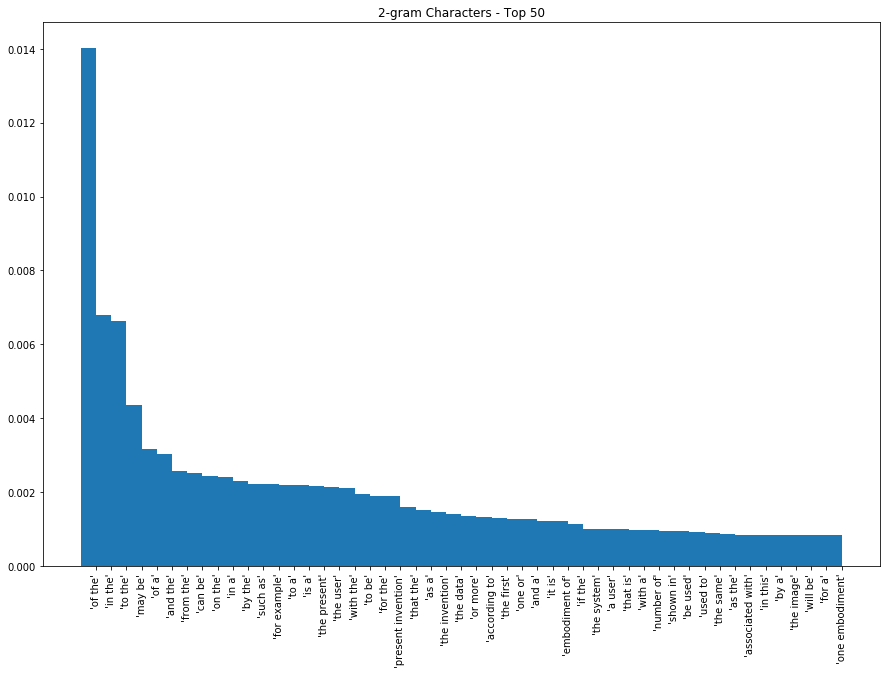

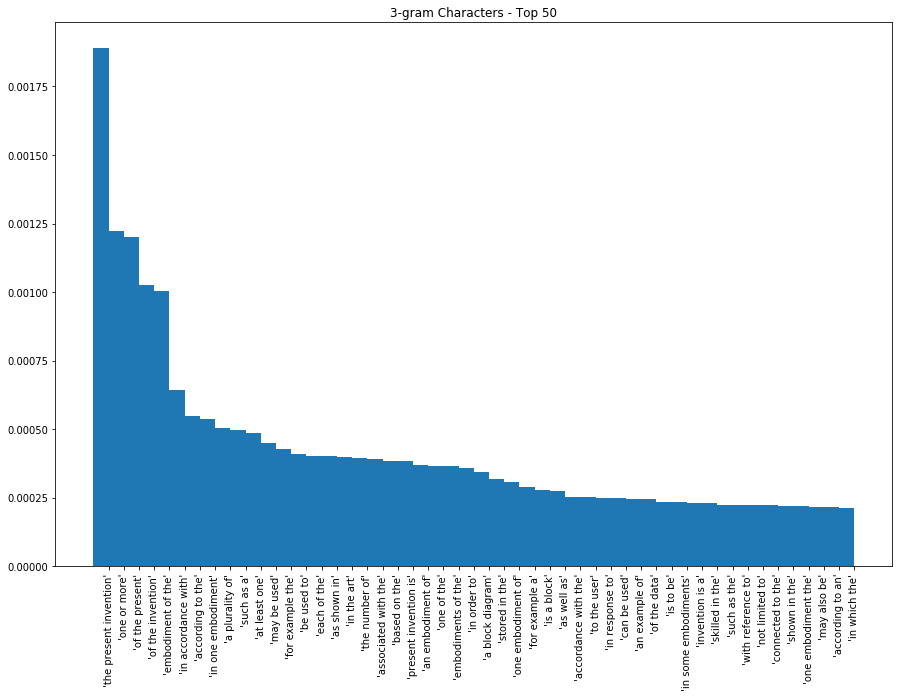

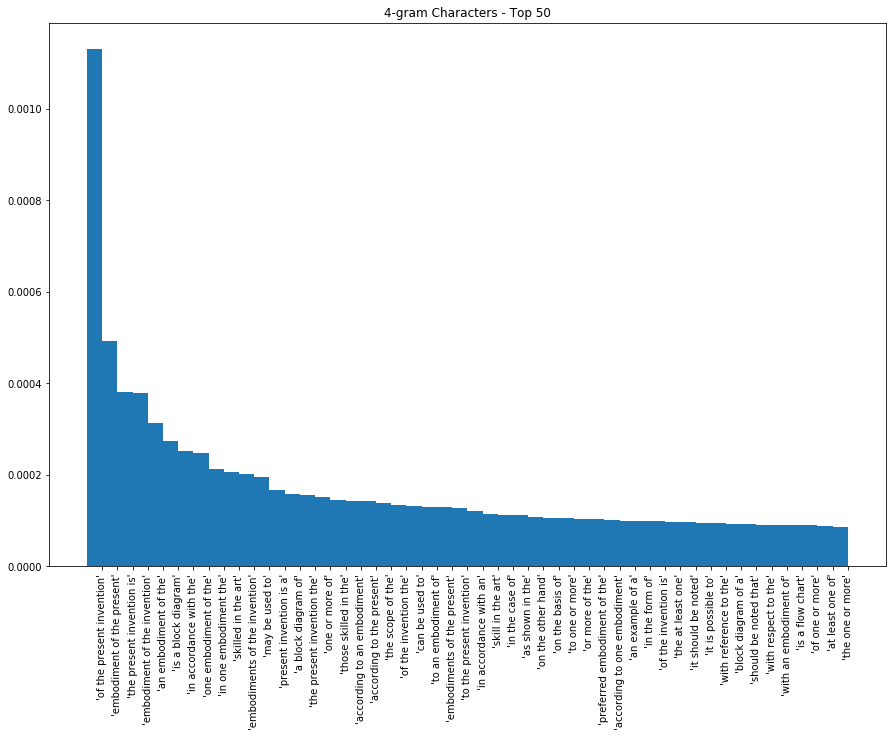

In [37]:
for n in range(2,5):
    # 50 is the max for a width of 15 inches
    labels, values = zip(*ngram_counter[n].most_common(50))

    # Normalise values
    values = np.array(values) / sum(ngram_counter[n].values())
    labels = ["'{0}'".format(l) for l in labels]

    indexes = np.arange(len(labels))
    width = 1

    plt.bar(indexes, values, width)
    plt.xticks(indexes + width * 0.5, labels, rotation=90)
    plt.title("{0}-gram Characters - Top 50".format(n))
    plt.show()

Observations:
* You want one of the values of n to be selected for the group - e.g. "one or more" (n=3) as opposed to "one or" and "or more" (n=2) or "of the present invention" as opposed to "the present invention" or "the present" and "in accordance with an embodiment of the present invention"?
* As we go higher we are driven more by dataset specific patterns (e.g. "request acceptance side communication") - these would be less common the more data we parsed.
* All tend to a power law distribution with a few sequences that occur much more than others - and with the distribution tending towards a normal distribution.

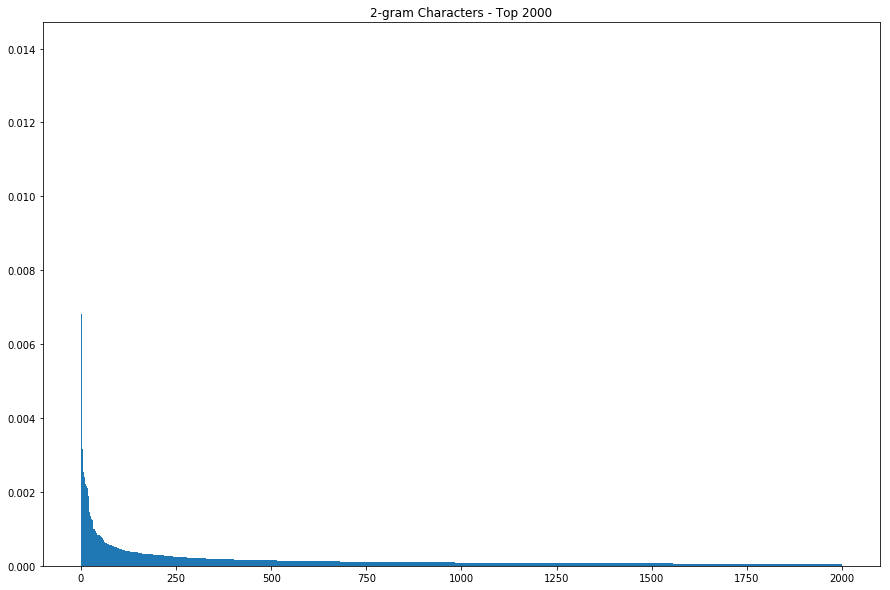

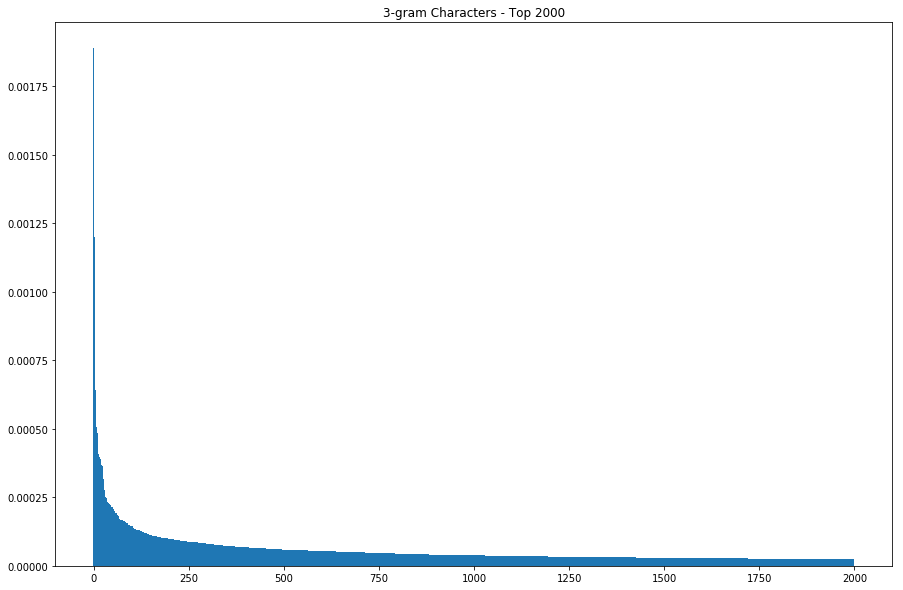

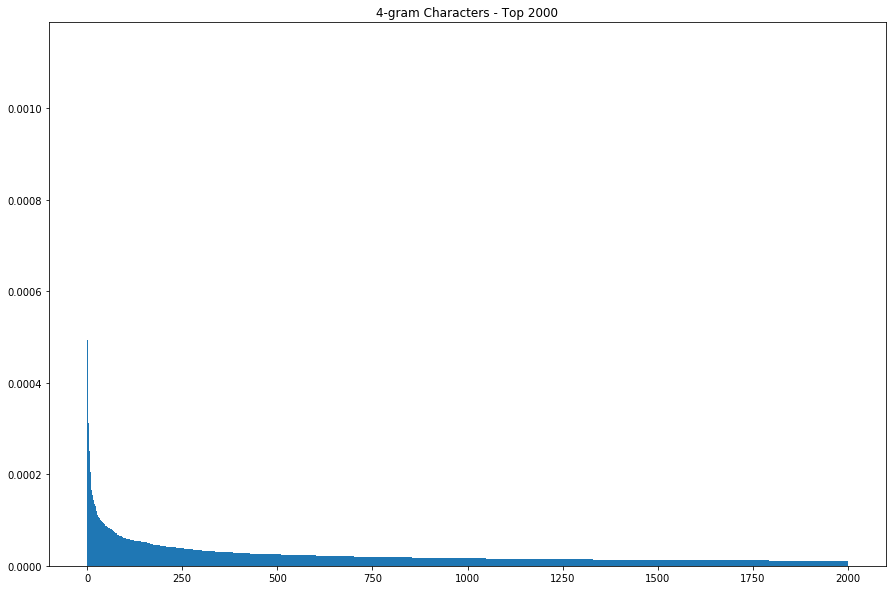

In [38]:
for n in range(2,5):
    # 50 is the max for a width of 15 inches
    labels, values = zip(*ngram_counter[n].most_common(2000))

    # Normalise values
    values = np.array(values) / sum(ngram_counter[n].values())
    #labels = ["'{0}'".format(l) for l in labels]

    indexes = np.arange(len(labels))
    width = 1

    plt.bar(indexes, values, width)
    #plt.xticks(indexes + width * 0.5, labels, rotation=90)
    plt.title("{0}-gram Characters - Top 2000".format(n))
    plt.show()

## Part-of-Speech Ngrams

In [41]:
pos = sum([p.pos for p in doc1.description.paragraphs], list())

In [42]:
pos

[('Provided', 'VBN'),
 ('are', 'VBP'),
 ('a', 'DT'),
 ('remote', 'JJ'),
 ('access', 'NN'),
 ('control', 'NN'),
 ('method', 'NN'),
 ('and', 'CC'),
 ('system', 'NN'),
 ('and', 'CC'),
 ('a', 'DT'),
 ('recording', 'NN'),
 ('medium', 'NN'),
 ('therefor', 'NN'),
 ('.', '.'),
 ('The', 'DT'),
 ('method', 'NN'),
 ('is', 'VBZ'),
 ('performed', 'VBN'),
 ('on', 'IN'),
 ('at', 'IN'),
 ('least', 'JJS'),
 ('one', 'CD'),
 ('peripheral', 'JJ'),
 ('device', 'NN'),
 ('connected', 'VBN'),
 ('to', 'TO'),
 ('a', 'DT'),
 ('plurality', 'NN'),
 ('of', 'IN'),
 ('monitors', 'NNS'),
 ('in', 'IN'),
 ('a', 'DT'),
 ('network', 'NN'),
 (',', ','),
 ('the', 'DT'),
 ('method', 'NN'),
 ('including', 'VBG'),
 ('if', 'IN'),
 ('a', 'DT'),
 ('change', 'NN'),
 ('event', 'NN'),
 ('occurs', 'VBZ'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('at', 'IN'),
 ('least', 'JJS'),
 ('one', 'CD'),
 ('peripheral', 'JJ'),
 ('device', 'NN'),
 (',', ','),
 ('the', 'DT'),
 ('monitor', 'NN'),
 ('changing', 'VBG'),
 ('a', 'DT'),
 ('file', 'NN'),
 ('syst

In [46]:
# This is the similar to the previous function - but the index is a joined string
def pos_ngram_list(pos, n):
    """ Return a list of character n-grams from the text."""
    just_pos = [p for w, p in pos]
    return [" ".join(just_pos[i:i+n]) for i in range(0, len(just_pos)-n+1)]  

In [47]:
pos_ngram = pos_ngram_list(pos, 3)

In [48]:
pos_ngram

['VBN VBP DT',
 'VBP DT JJ',
 'DT JJ NN',
 'JJ NN NN',
 'NN NN NN',
 'NN NN CC',
 'NN CC NN',
 'CC NN CC',
 'NN CC DT',
 'CC DT NN',
 'DT NN NN',
 'NN NN NN',
 'NN NN .',
 'NN . DT',
 '. DT NN',
 'DT NN VBZ',
 'NN VBZ VBN',
 'VBZ VBN IN',
 'VBN IN IN',
 'IN IN JJS',
 'IN JJS CD',
 'JJS CD JJ',
 'CD JJ NN',
 'JJ NN VBN',
 'NN VBN TO',
 'VBN TO DT',
 'TO DT NN',
 'DT NN IN',
 'NN IN NNS',
 'IN NNS IN',
 'NNS IN DT',
 'IN DT NN',
 'DT NN ,',
 'NN , DT',
 ', DT NN',
 'DT NN VBG',
 'NN VBG IN',
 'VBG IN DT',
 'IN DT NN',
 'DT NN NN',
 'NN NN VBZ',
 'NN VBZ IN',
 'VBZ IN DT',
 'IN DT IN',
 'DT IN JJS',
 'IN JJS CD',
 'JJS CD JJ',
 'CD JJ NN',
 'JJ NN ,',
 'NN , DT',
 ', DT NN',
 'DT NN VBG',
 'NN VBG DT',
 'VBG DT NN',
 'DT NN NN',
 'NN NN IN',
 'NN IN DT',
 'IN DT JJ',
 'DT JJ NN',
 'JJ NN :',
 'NN : DT',
 ': DT NN',
 'DT NN VBG',
 'NN VBG NN',
 'VBG NN VBG',
 'NN VBG DT',
 'VBG DT VBN',
 'DT VBN NN',
 'VBN NN NN',
 'NN NN TO',
 'NN TO DT',
 'TO DT NN',
 'DT NN :',
 'NN : DT',
 ': DT NN',
 

554570 records located.
100 records sampled.
0 Communication system and communication management method
5 Techniques for monitoring a data stream
10 Retailer optimization using market segmentation top quintile process
15 System and Method for Generating and Using Fingerprints for Integrity Management
20 Comprehensive, quality-based interval scores for analysis of comparative genomic hybridization data
25 Application program interfaces and structures in a resource limited operating system
30 System and method for saving browsed data
35 METHOD FOR CONTROLLING DATA TRANSMISSION AND RELATED DEVICE
40 System and method for delivering messages onto a sale register receipt
45 METHOD OF CONSTRUCTING A DIGITAL MODEL OF A ROUTE
50 Mail sorting system
55 Methods and systems for a re-marketing model for loans
60 Method and apparatus for synchronizing not-logged application temporary tables in a multi-node relational database management system


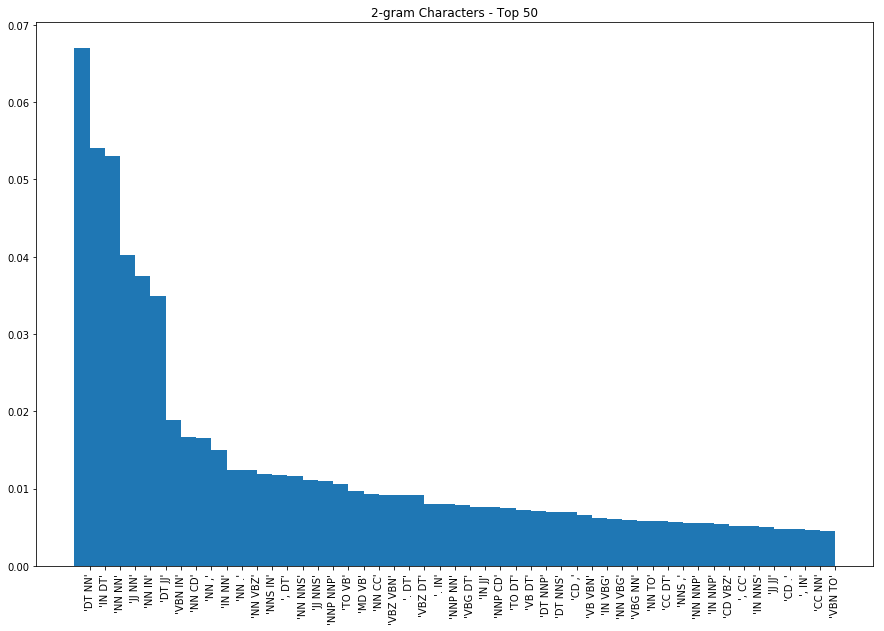

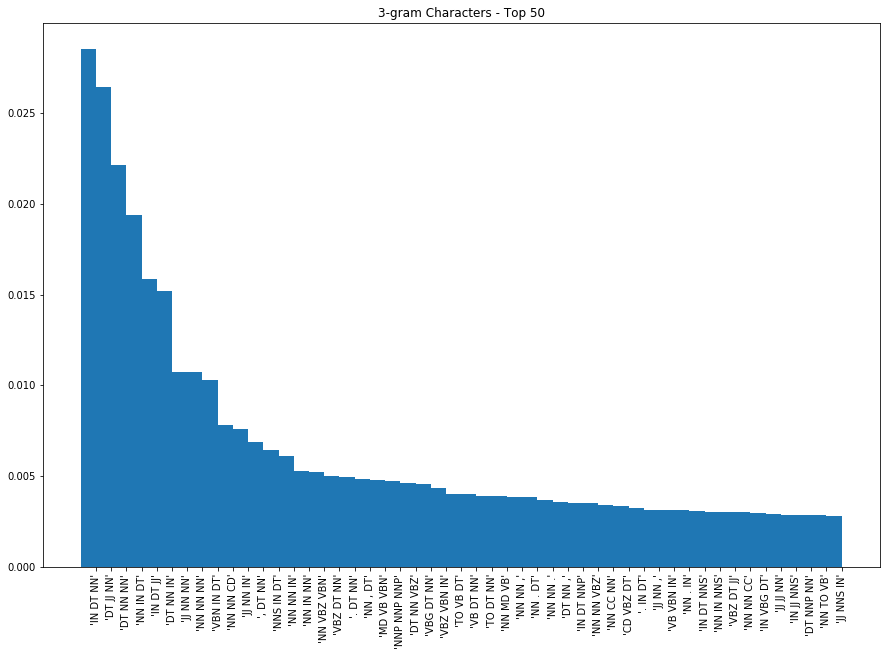

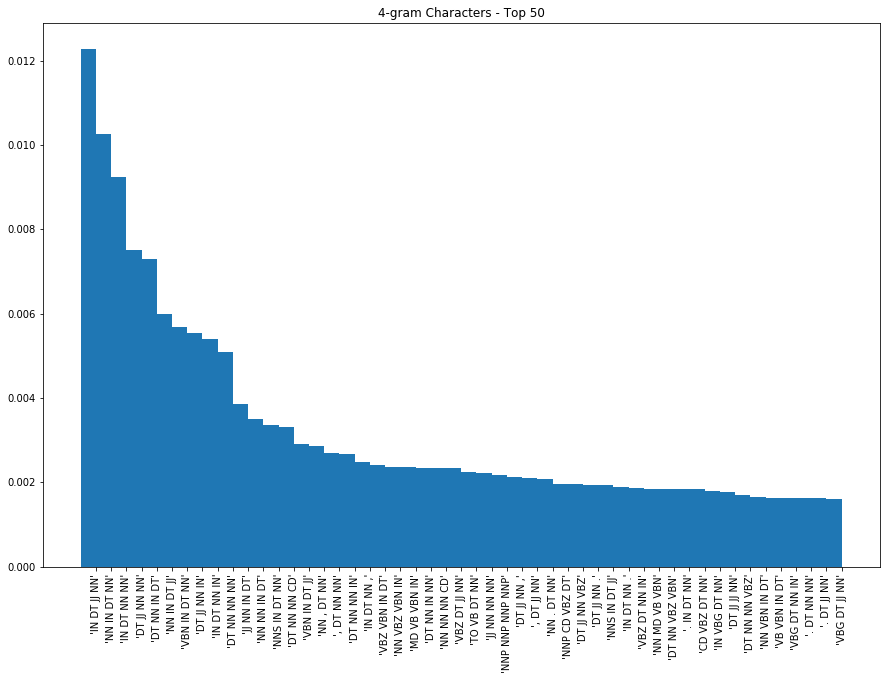

In [49]:
filename = "ngramstats_pos_100.pkl"

if os.path.isfile(filename):
    with open(filename, "rb") as f:
        print("Loading data")
        ngram_counter = pickle.load(f)
        print("Stats loaded")
else:
    filegenerator = pubs.patentdoc_generator(['G', '06'], sample_size=100)
    n_range = range(2,8)
    for n in n_range:
        ngram_counter[n] = Counter()
    for i, doc in enumerate(filegenerator):
        if (i % 5) == 0:
            print(i, doc.title)
        text = sum([p.pos for p in doc.description.paragraphs], list())
        for n in n_range:
            ngram_counter[n] += Counter(pos_ngram_list(text, n))
    with open(filename, "wb") as f:
        pickle.dump(ngram_counter, f)
        
for n in range(2,5):
    # 50 is the max for a width of 15 inches
    labels, values = zip(*ngram_counter[n].most_common(50))

    # Normalise values
    values = np.array(values) / sum(ngram_counter[n].values())
    labels = ["'{0}'".format(l) for l in labels]

    indexes = np.arange(len(labels))
    width = 1

    plt.bar(indexes, values, width)
    plt.xticks(indexes + width * 0.5, labels, rotation=90)
    plt.title("{0}-gram Characters - Top 50".format(n))
    plt.show()

Observations:
* The most frequent patterns appear to relate more to noun use than verb use (verbs only seem to crop up once in the 10 most frequency n-grams).
* Sentences seem more likely to end on a noun ("NN . " is more frequent).
* The pattern "IN DT [Noun Phrase]" is common.
* These patterns are not independent of the word ngram patterns.

Another interesting thing to measure is the frequency of different noun phrase patterns.  

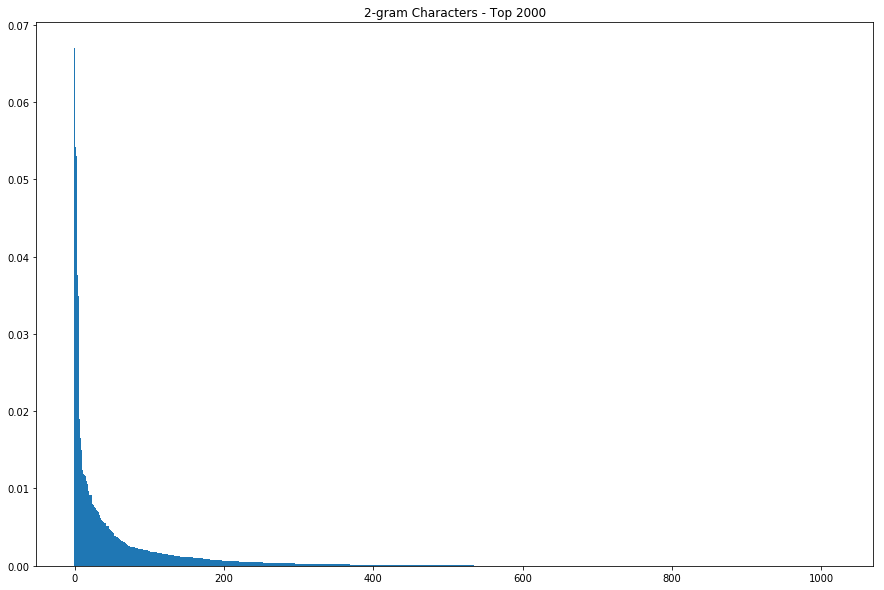

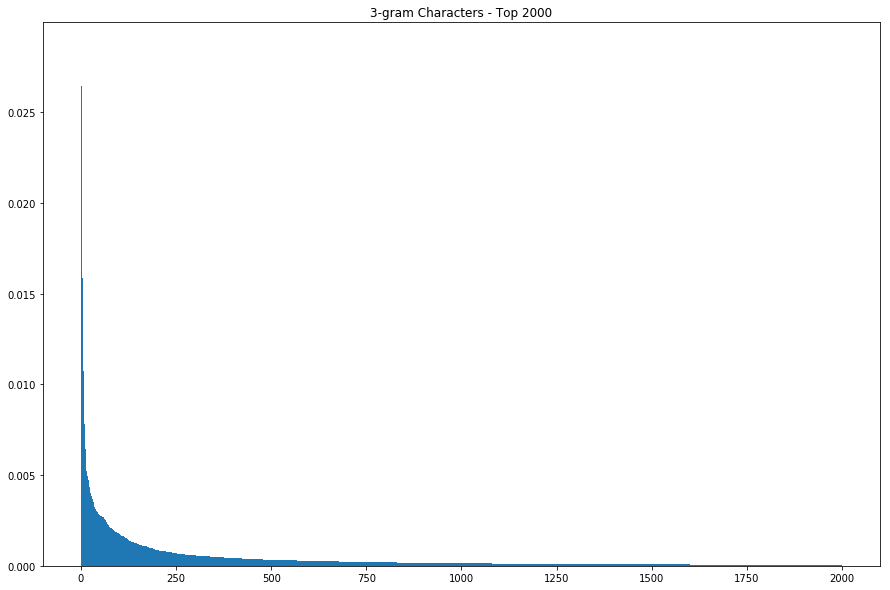

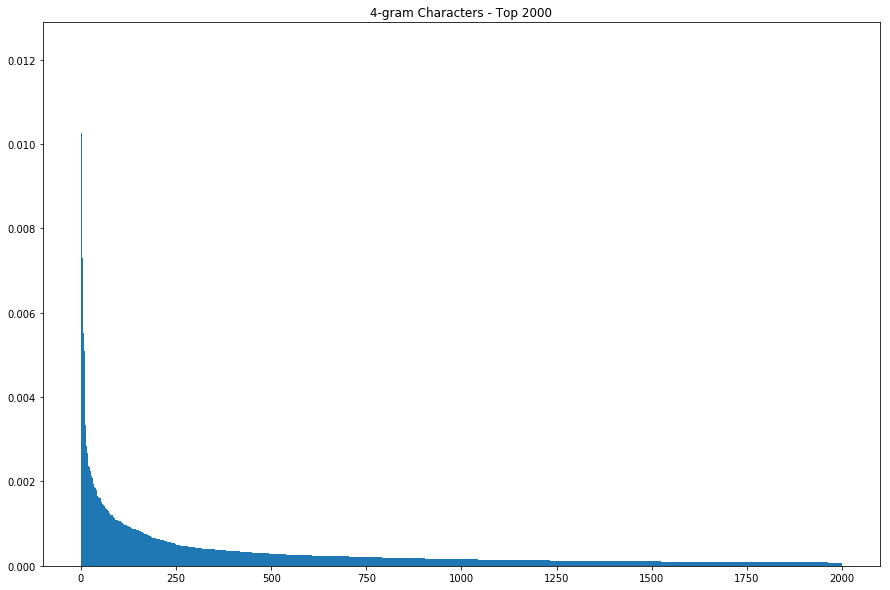

In [52]:
for n in range(2,5):
    # 50 is the max for a width of 15 inches
    labels, values = zip(*ngram_counter[n].most_common(2000))

    # Normalise values
    values = np.array(values) / sum(ngram_counter[n].values())
    #labels = ["'{0}'".format(l) for l in labels]

    indexes = np.arange(len(labels))
    width = 1

    plt.bar(indexes, values, width)
    #plt.xticks(indexes + width * 0.5, labels, rotation=90)
    plt.title("{0}-gram Characters - Top 2000".format(n))
    plt.show()

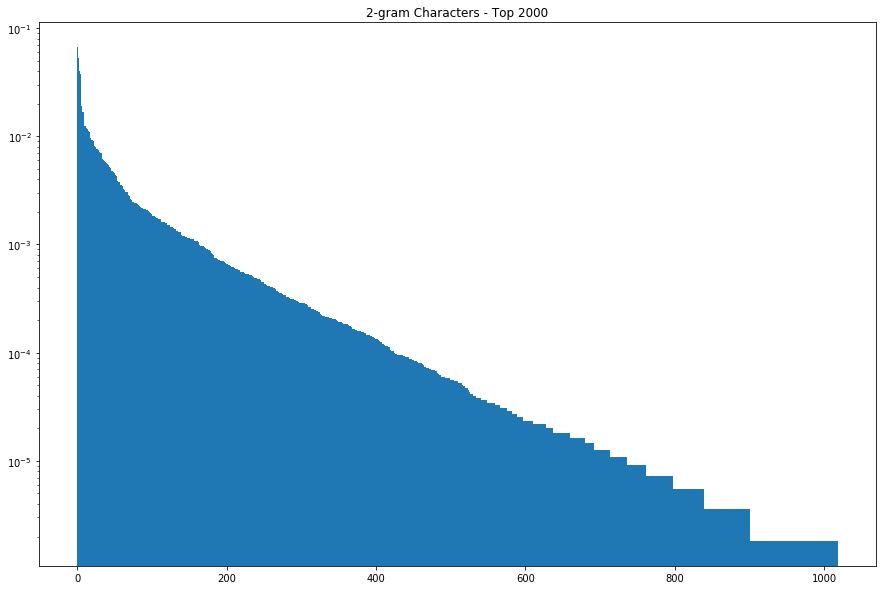

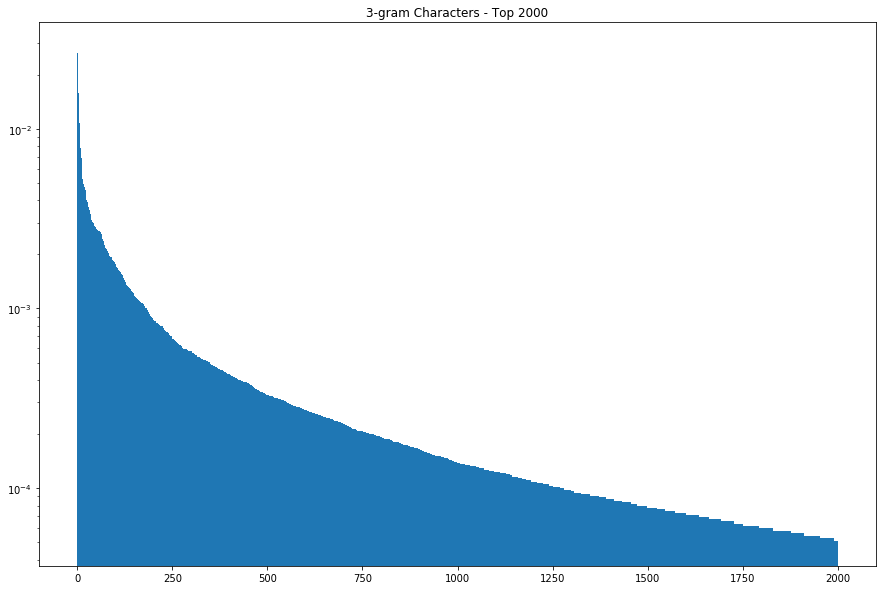

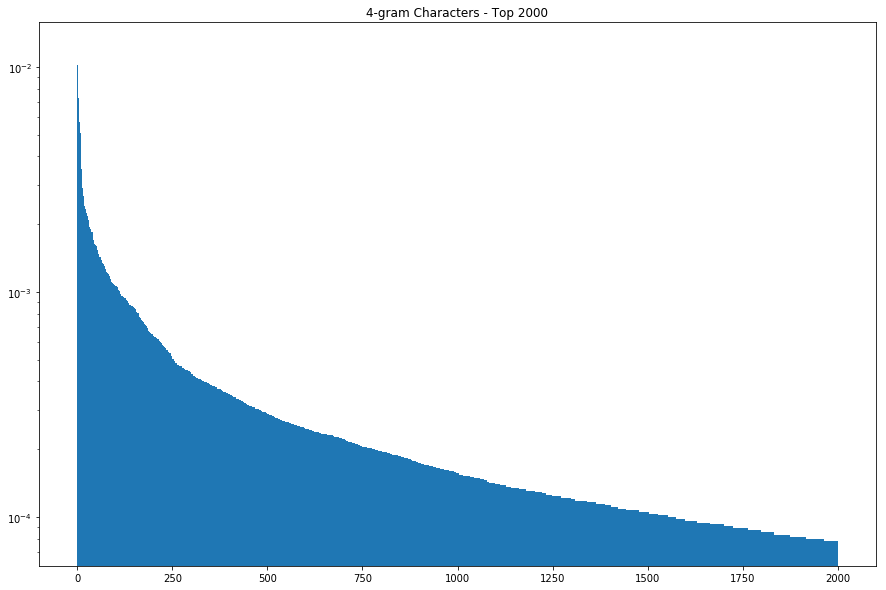

In [54]:
for n in range(2,5):
    # 50 is the max for a width of 15 inches
    labels, values = zip(*ngram_counter[n].most_common(2000))

    # Normalise values
    values = np.array(values) / sum(ngram_counter[n].values())
    #labels = ["'{0}'".format(l) for l in labels]

    indexes = np.arange(len(labels))
    width = 1

    plt.bar(indexes, values, width)
    #plt.xticks(indexes + width * 0.5, labels, rotation=90)
    plt.title("{0}-gram Characters - Top 2000".format(n))
    plt.yscale("log")
    plt.show()

Although on a log plot on the y-axis we still have a curve meaning that a power law distribution does not entirely fit.  

The fit appears better for a power-law distribution for lower n.  